<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re
import sys
sys.path.append("../")
import seaborn as sns 
import matplotlib.pyplot as plt

from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


In [7]:
df = pd.read_csv('autorenew_clean.csv',index_col=0)


In [8]:
df.head(2)

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,...,postalCode,lastSeen,price_knn,yearOfRegistration_knn,powerCV_knn,kilometer_knn,monthOfRegistration_knn,nrOfPictures_knn,yearCreated_knn,monthCreated_knn
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,...,70435,2016-04-07 03:16:57,480.0,1993.0,0.0,150000.0,0.0,0.0,2016.0,3.0
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,...,66954,2016-04-07 01:46:50,18300.0,2011.0,187.0,125000.0,5.0,0.0,2016.0,3.0


In [9]:
df['monthOfRegistration_knn'] = df['monthOfRegistration_knn'].astype('O')          #DECIDIMOS QUE ES UNA VARIABLE CATEGORICA.

In [10]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_robust", "kilometer_Ratesrobust", "yearOfRegistration_Ratesrobust"]] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_min_max", "kilometer_min_max", "yearOfRegistration_min_max"]]  = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_norm", "kilometer_norm", "yearOfRegistration_norm"]]  = datos_transf_norm

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_estandar", "kilometer_estandar", "yearOfRegistration_estandar"]]  = datos_transf_estandar

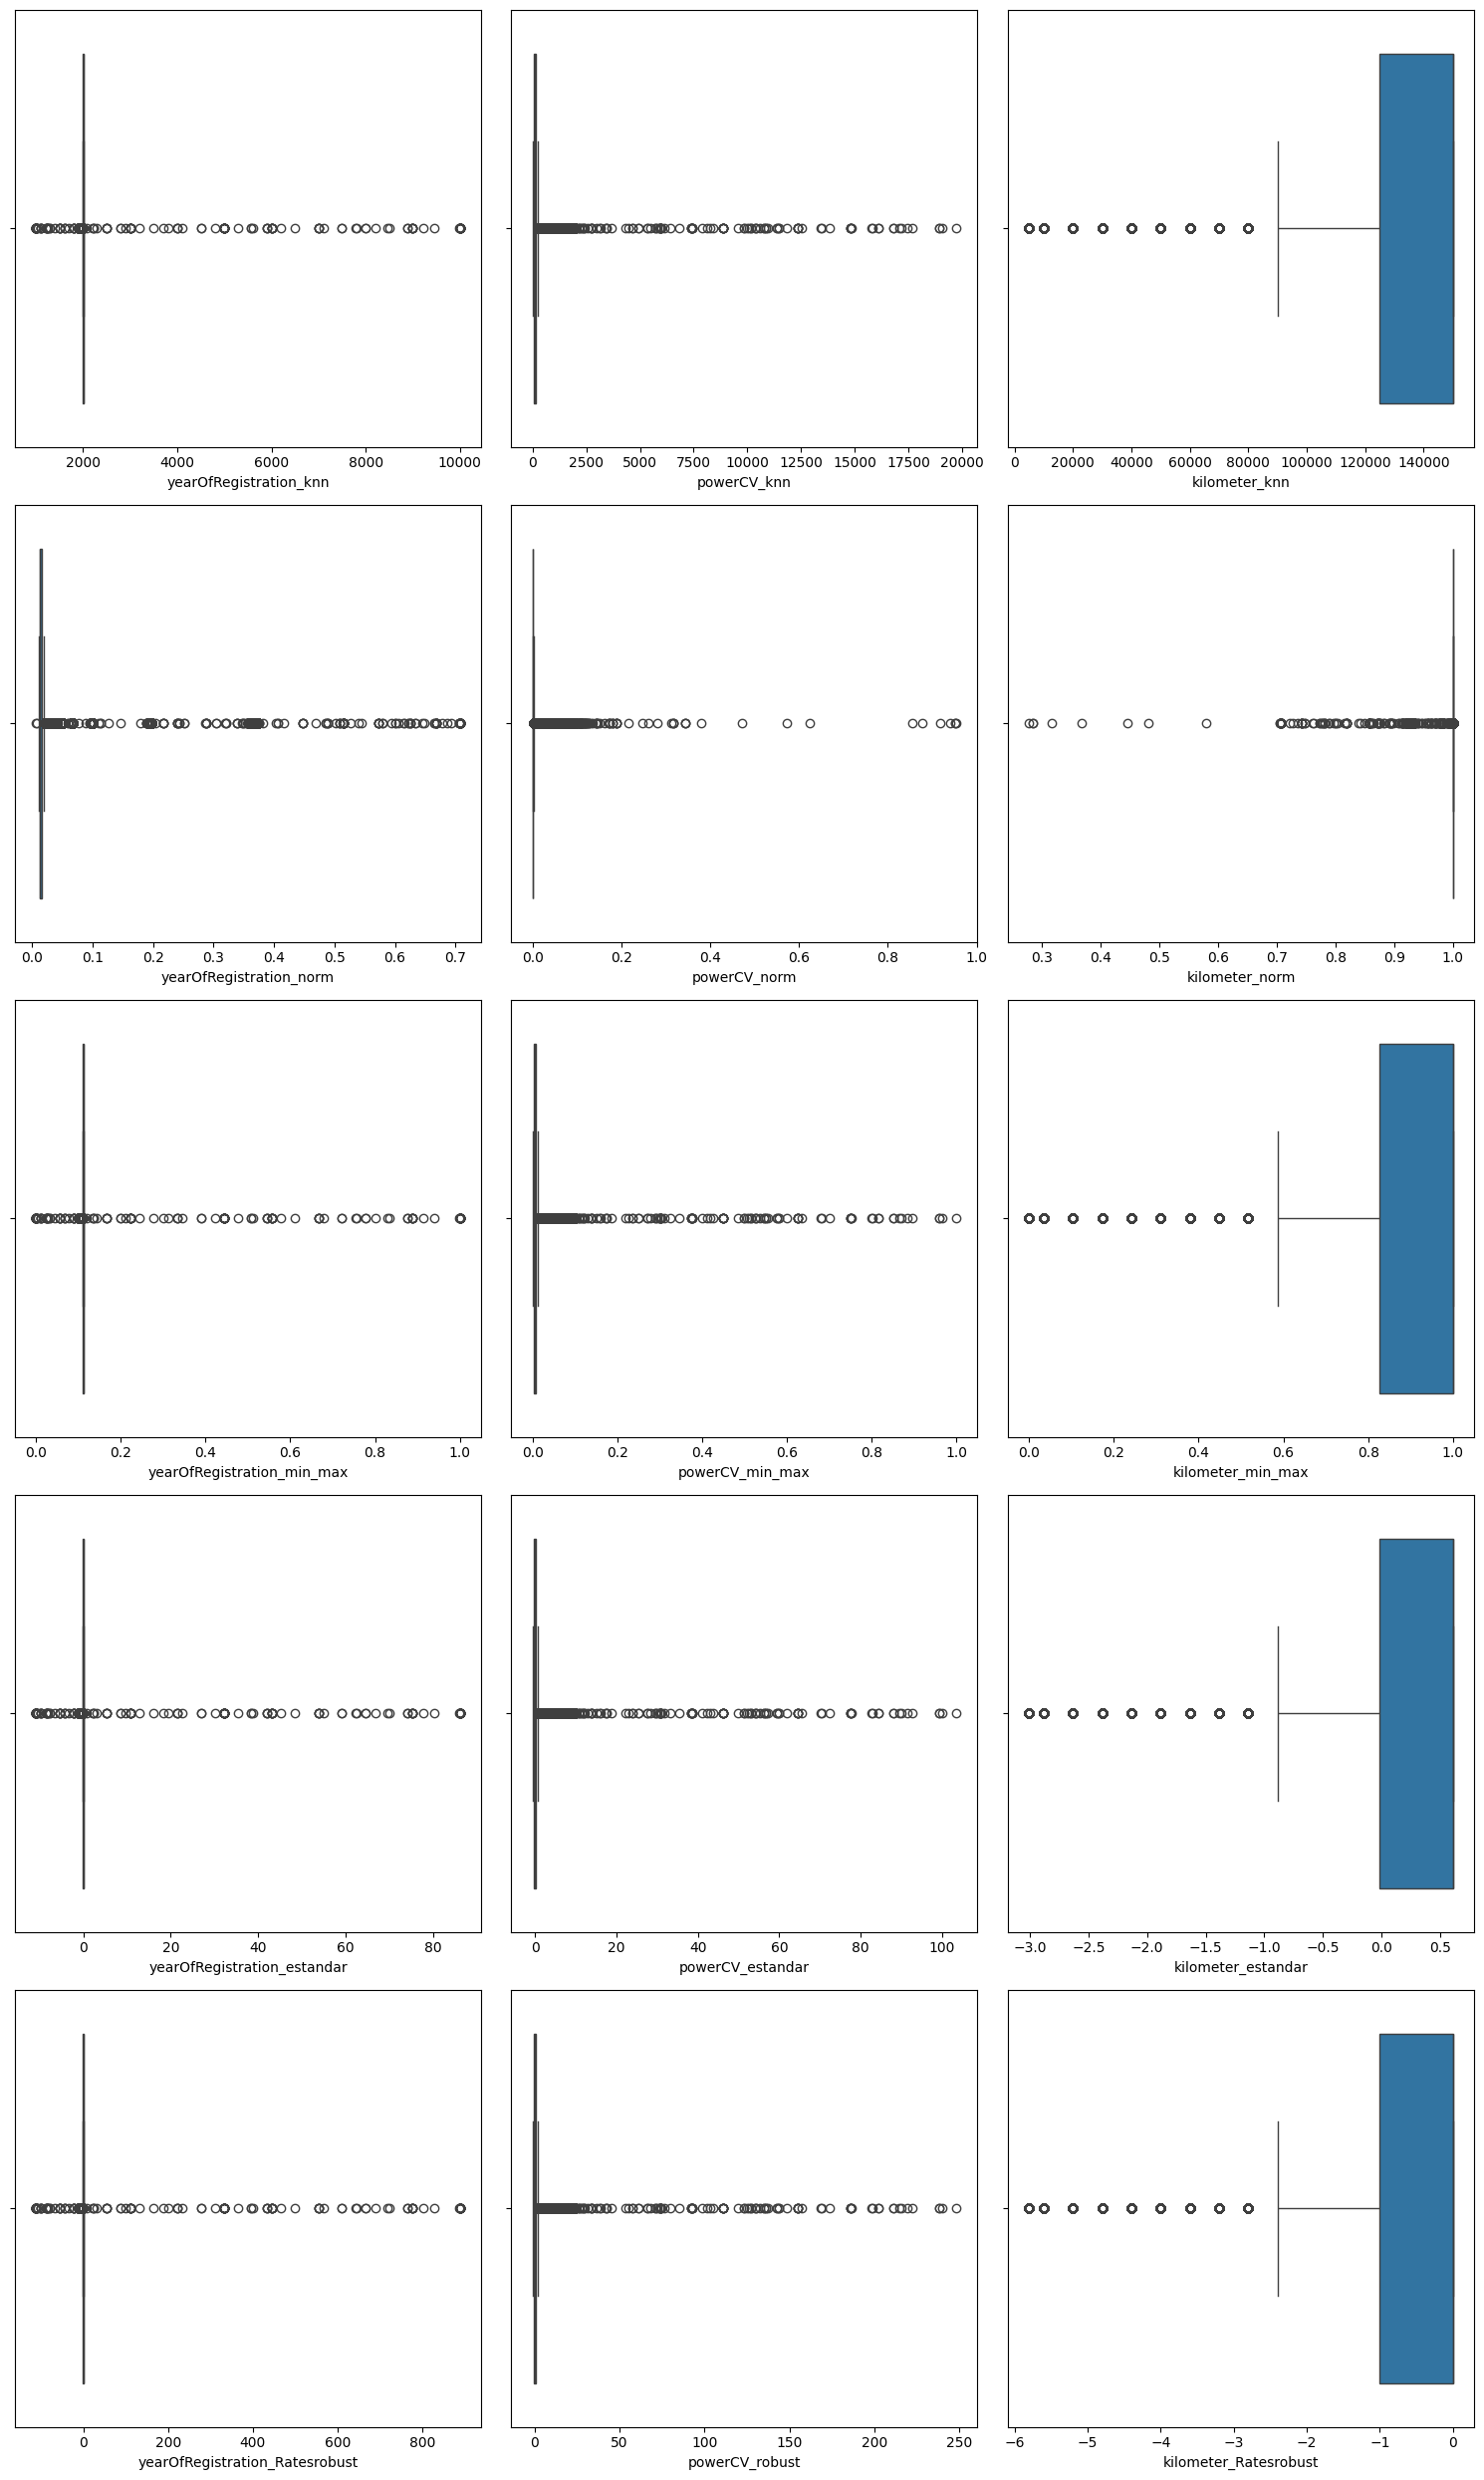

In [11]:
fig, axes = plt.subplots(nrows=5 , ncols=3, figsize = (15, 25) )

sns.boxplot(x = "yearOfRegistration_knn", data = df, ax = axes[0][0])
sns.boxplot(x = "powerCV_knn", data = df, ax = axes[0][1])
sns.boxplot(x = "kilometer_knn", data = df, ax = axes[0][2])

sns.boxplot(x = "yearOfRegistration_norm", data = df, ax = axes[1][0])
sns.boxplot(x = "powerCV_norm", data = df, ax = axes[1][1])
sns.boxplot(x = "kilometer_norm", data = df, ax = axes[1][2])


sns.boxplot(x = "yearOfRegistration_min_max", data = df, ax = axes[2][0])
sns.boxplot(x = "powerCV_min_max", data = df, ax = axes[2][1])
sns.boxplot(x = "kilometer_min_max", data = df, ax = axes[2][2])

sns.boxplot(x = "yearOfRegistration_estandar", data = df, ax = axes[3][0])
sns.boxplot(x = "powerCV_estandar", data = df, ax = axes[3][1])
sns.boxplot(x = "kilometer_estandar", data = df, ax = axes[3][2])


sns.boxplot(x = "yearOfRegistration_Ratesrobust", data = df, ax = axes[4][0])
sns.boxplot(x = "powerCV_robust", data = df, ax = axes[4][1])
sns.boxplot(x = "kilometer_Ratesrobust", data = df, ax = axes[4][2])

plt.tight_layout()


Tal y como observamos los datos, desde nuestro punto de vista nos vamos a quedar con el escalador_estandar, debido a que podemos ver que la escala es mas ajustada perdiendo menos informacion necesaria y teniendo datos mas ajustados para la comparacion entre ellos. Tambien en la exploración previa observamos en los datos que los oulaiers no eran datos necesarios para el estudio momentaneamente , puesto que parecian errores en los datos maximos y minimos.

Continuaremos con el estudio...

In [12]:
df_describe_personalizado = df.describe().T                                     #genero un describe y lo meto en una variable
df_describe_personalizado.drop(columns=["count", "mean"], inplace=True)         #borramos la media y el conteo, porque lo que queremos es visualizar la tabla con las escalas.   
df_describe_personalizado
indices_a_eliminar = ['postalCode', 'nrOfPictures_knn']                         #eliminos indices irrelevantes, columnas que no son relevantes para el estudio.
df_describe_personalizado.drop(index=indices_a_eliminar, inplace=True)              

In [13]:
indices_a_eliminar = ['powerCV_norm', 'kilometer_norm','yearOfRegistration_norm']                        
df_describe_personalizado.drop(index=indices_a_eliminar, inplace=True)                  #sabemos que la distribucion no es normal
                                                                                        #por lo el normalicer no nos va a servir
                                                                                        #en la visualizacion del describe.

In [14]:
df_describe_personalizado       #Realizamos un describe personalizado para la comparativa de los escalados 
                                #y sus diferente metodos.

,std,min,25%,50%,75%,max
price_knn,3.588094e+06,0.000000,1150.000000,2950.000000,7200.000000,2.147484e+09
yearOfRegistration_knn,9.287018e+01,1000.000000,1999.000000,2003.000000,2008.000000,9.999000e+03
powerCV_knn,1.895232e+02,0.000000,69.000000,104.000000,148.000000,1.972600e+04
kilometer_knn,4.011236e+04,5000.000000,125000.000000,150000.000000,150000.000000,1.500000e+05
yearCreated_knn,9.424574e-03,2014.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
monthCreated_knn,3.774711e-01,1.000000,3.000000,3.000000,3.000000,1.200000e+01
powerCV_robust,2.399028e+00,-1.316456,-0.443038,0.000000,0.556962,2.483797e+02
kilometer_Ratesrobust,1.604495e+00,-5.800000,-1.000000,0.000000,0.000000,0.000000e+00
yearOfRegistration_Ratesrobust,1.031891e+01,-111.444444,-0.444444,0.000000,0.555556,8.884444e+02
powerCV_min_max,9.607788e-03,0.000000,0.003498,0.005272,0.007503,1.000000e+00


In [15]:
df.to_csv('datos_actuales.csv')